In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
rhpass=pd.read_csv("filter_ssh_attack_linux_tcpdump.csv", parse_dates=['Time'])
rhpass.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,4128,2011-11-16 16:36:55,10.10.10.5,10.10.10.20,SSH,89,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)
1,4668,2011-11-16 16:37:09,10.10.10.5,10.10.10.20,SSHv1,89,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)
2,4714,2011-11-16 16:37:09,10.10.10.20,10.10.10.5,SSHv1,86,Client: Protocol (SSH-1.5-NmapNSE_1.0)
3,4737,2011-11-16 16:37:09,10.10.10.5,10.10.10.20,SSHv1,342,Server: Public Key
4,4812,2011-11-16 16:37:09,10.10.10.5,10.10.10.20,SSHv1,89,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)


In [4]:
rhpass["Type"] = rhpass.apply(lambda x: "Client" if x["Source"] == rhpass.irow(0)["Source"] else "Server", axis=1)

In [5]:
rhpass.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Type
0,4128,2011-11-16 16:36:55,10.10.10.5,10.10.10.20,SSH,89,Server: Protocol (SSH-1.99-OpenSSH_3.5p1),Client
1,4668,2011-11-16 16:37:09,10.10.10.5,10.10.10.20,SSHv1,89,Server: Protocol (SSH-1.99-OpenSSH_3.5p1),Client
2,4714,2011-11-16 16:37:09,10.10.10.20,10.10.10.5,SSHv1,86,Client: Protocol (SSH-1.5-NmapNSE_1.0),Server
3,4737,2011-11-16 16:37:09,10.10.10.5,10.10.10.20,SSHv1,342,Server: Public Key,Client
4,4812,2011-11-16 16:37:09,10.10.10.5,10.10.10.20,SSHv1,89,Server: Protocol (SSH-1.99-OpenSSH_3.5p1),Client


In [6]:
infodata2 = rhpass[['Length','Time','Info']]
infodata2.head()

,Length,Time,Info
0,89,2011-11-16 16:36:55,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)
1,89,2011-11-16 16:37:09,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)
2,86,2011-11-16 16:37:09,Client: Protocol (SSH-1.5-NmapNSE_1.0)
3,342,2011-11-16 16:37:09,Server: Public Key
4,89,2011-11-16 16:37:09,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)


In [7]:
infodata2 = infodata2.set_index('Time')
infodata2.head()

,Length,Info
Time,,
2011-11-16 16:36:55,89,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)
2011-11-16 16:37:09,89,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)
2011-11-16 16:37:09,86,Client: Protocol (SSH-1.5-NmapNSE_1.0)
2011-11-16 16:37:09,342,Server: Public Key
2011-11-16 16:37:09,89,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)


In [8]:
infodata2.resample('T',how=sum).head()

,Length
Time,
2011-11-16 16:36:00,89
2011-11-16 16:37:00,5330
2011-11-16 16:38:00,4321
2011-11-16 16:39:00,82334
2011-11-16 16:40:00,243


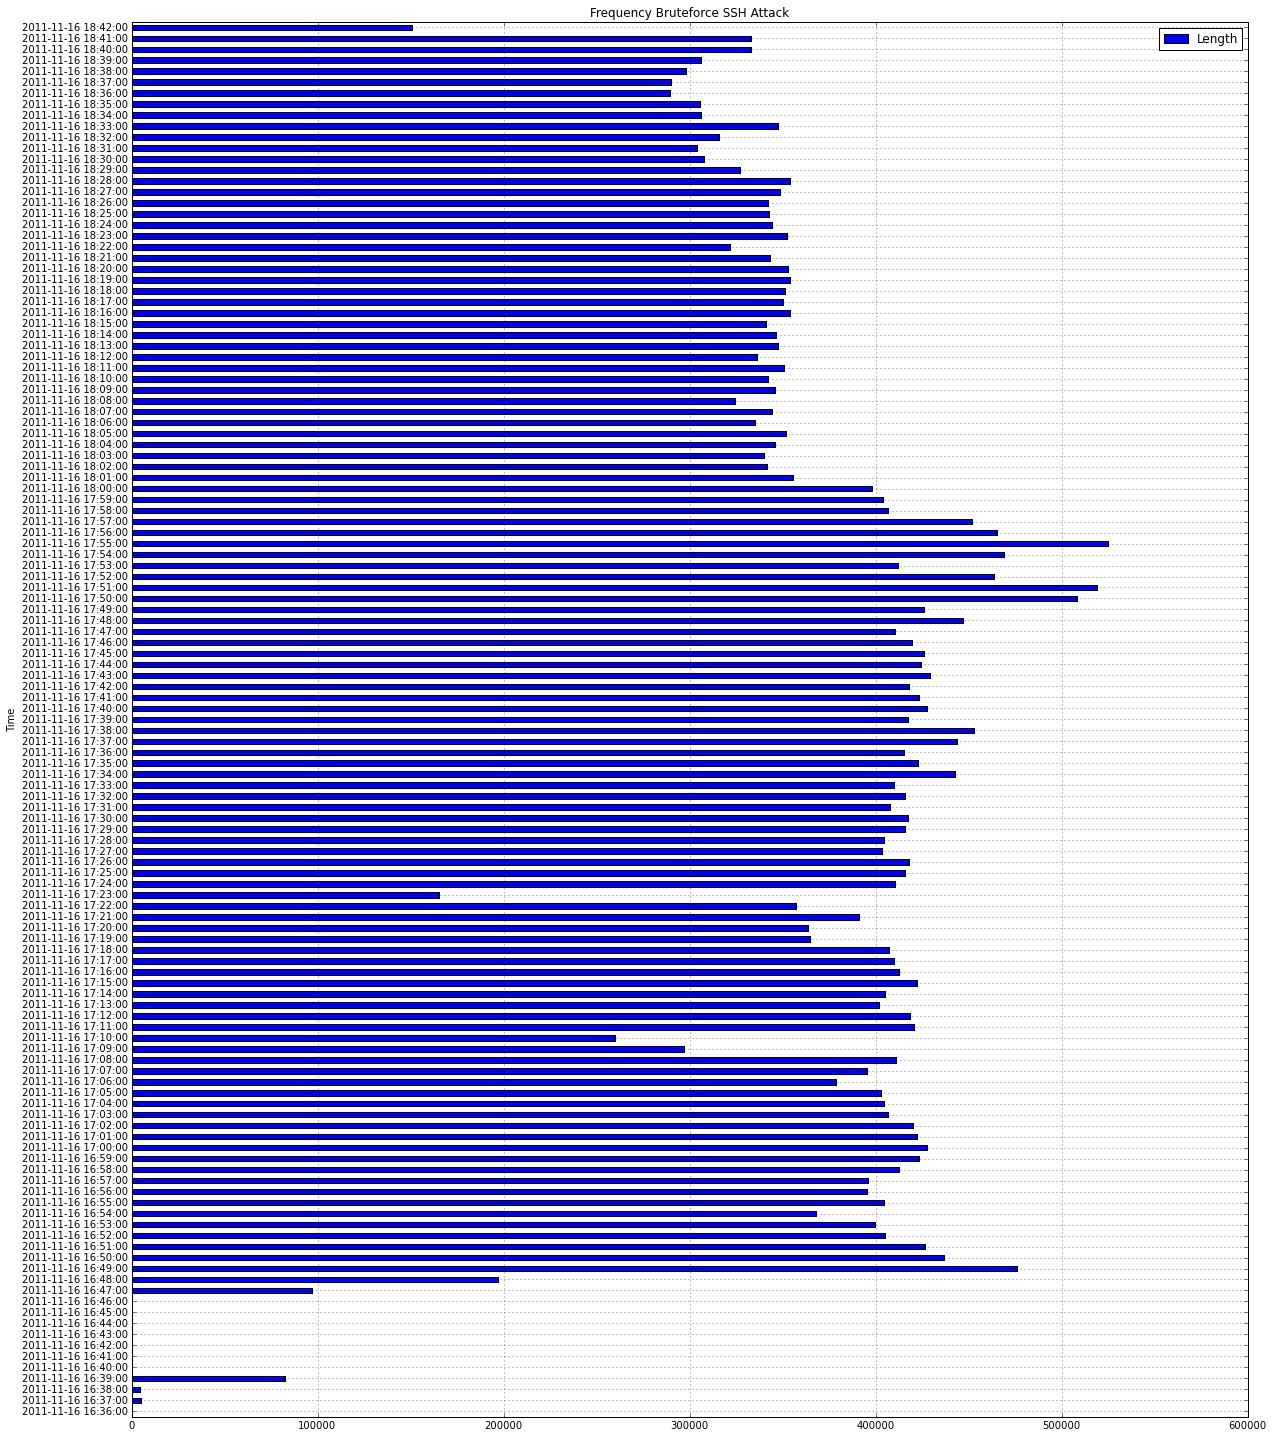

In [16]:
infodata2_plot = infodata2.resample('T',how=sum).plot(kind="barh",title="Frequency Bruteforce SSH Attack",figsize=(20,25),legend=True)

In [10]:
fig = infodata2_plot.get_figure()
fig.savefig("Frekuensi Bruteforce SSH Attack-linux time.png")

In [11]:
rhpass.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Type
0,4128,2011-11-16 16:36:55,10.10.10.5,10.10.10.20,SSH,89,Server: Protocol (SSH-1.99-OpenSSH_3.5p1),Client
1,4668,2011-11-16 16:37:09,10.10.10.5,10.10.10.20,SSHv1,89,Server: Protocol (SSH-1.99-OpenSSH_3.5p1),Client
2,4714,2011-11-16 16:37:09,10.10.10.20,10.10.10.5,SSHv1,86,Client: Protocol (SSH-1.5-NmapNSE_1.0),Server
3,4737,2011-11-16 16:37:09,10.10.10.5,10.10.10.20,SSHv1,342,Server: Public Key,Client
4,4812,2011-11-16 16:37:09,10.10.10.5,10.10.10.20,SSHv1,89,Server: Protocol (SSH-1.99-OpenSSH_3.5p1),Client


In [12]:
category_group=rhpass.groupby(['Source','Destination','Protocol']).sum()
category_group.head()

No.  Length
Source      Destination Protocol                   
10.10.10.15 10.10.10.5  SSH           73203     194
                        SSHv1        143820     223
                        SSHv2     185760947   49227
10.10.10.20 10.10.10.5  SSH        19606386    7722
                        SSHv1         64343     358

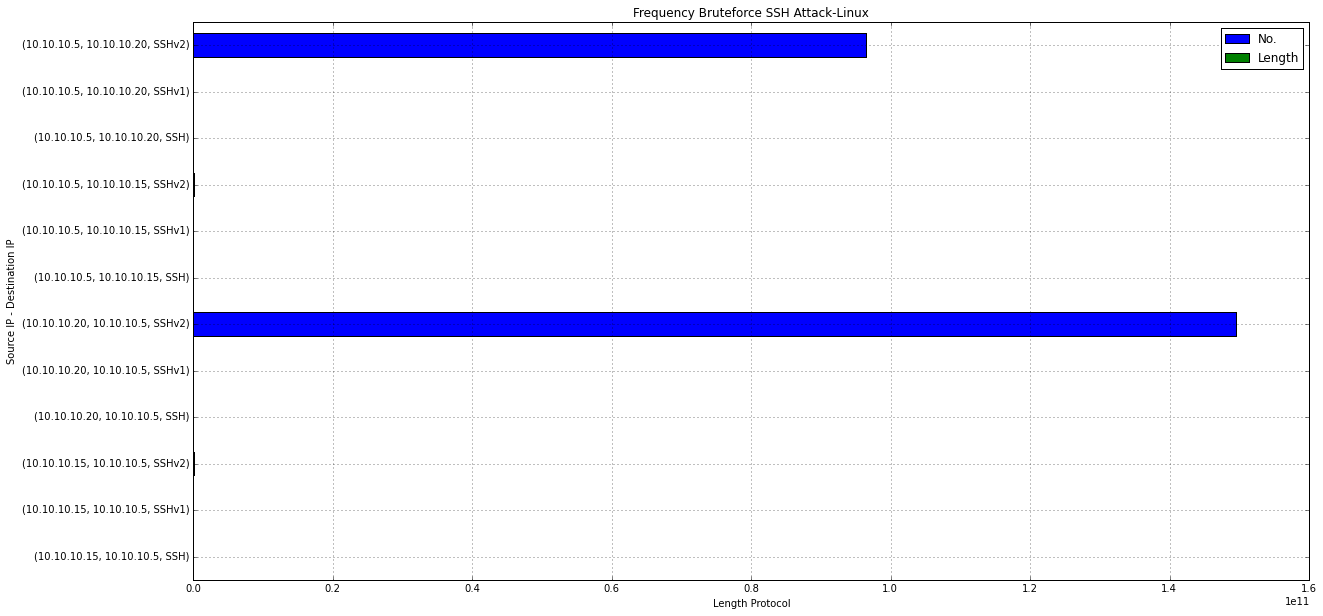

In [13]:
my_plot = category_group.plot(kind='barh',stacked=True,title="Frequency Bruteforce SSH Attack-Linux",figsize=(20,10))
my_plot.set_xlabel("Length Protocol")
my_plot.set_ylabel("Source IP - Destination IP")

In [14]:
fig = infodata2_plot.get_figure()
fig.savefig("Frekuensi Bruteforce SSH Attack-Linux.png")